# PACF based modelexplanation

In [1]:
# Import packages
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import pacf
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import os
# Get the parent directory and add it to sys.path
parent_dir = os.path.abspath("..")
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

from functions_nico.nico_fuelprophet import FuelProphet
from functions_nico.nico_preprocessing import load_data

In [2]:
# Load data
df = load_data("../data/fueldata/wertheim_23-25.parquet")

# Reduce data
df = df[df["datetime"] >= pd.to_datetime("2025-01-01")]
df = df[df["station_uuid"] == "fb0f8030-c1eb-4df1-9410-054eea7422ad"]

In [16]:
# Calculate PACF values
pacf_vals = pacf(np.array(df["e5"]), nlags=600)
pacf_vals = pacf_vals[1:]
lags = range(0, len(pacf_vals))

features = np.negative(np.array(lags)[abs(pacf_vals) > 0.2])

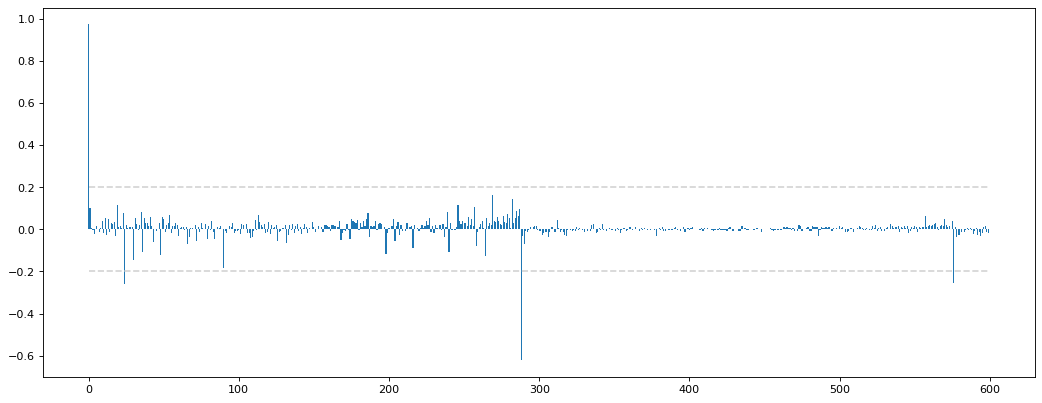

Features:  [   0  -24 -288 -576]


In [17]:
# Plot PACF values
plt.figure(figsize=(16, 6), dpi=80)
plt.bar(lags,pacf_vals)
plt.hlines([0.2,-0.2],0,600,color="lightgray",linestyle="dashed")
plt.show()
print("Features: ",features)